In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.Express as pt
%matplotlib inline

sns.set_theme()

In [7]:
netflixdata=pd.read_csv('netflixdata.csv')
netflixdata.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
netflixdata.info()

Text(0.5, 1.0, 'Count the people Movie and TV Show')

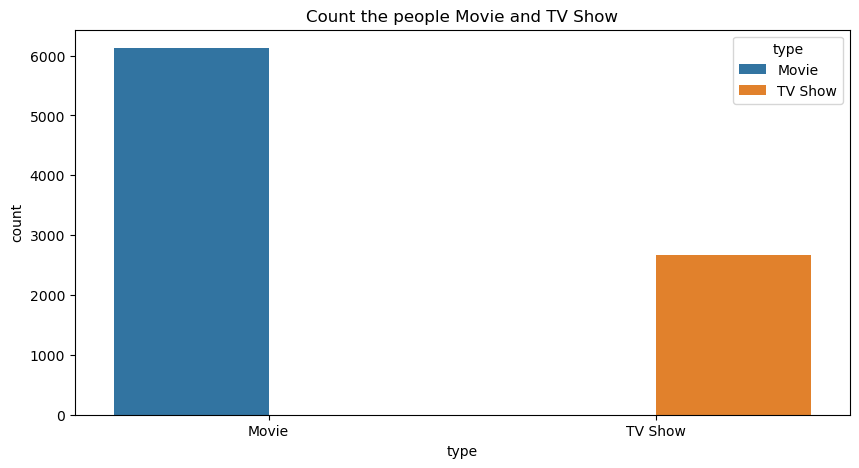

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(netflixdata,x='type',hue='type')
plt.title('Count the people Movie and TV Show')

In [15]:
netflixdata.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


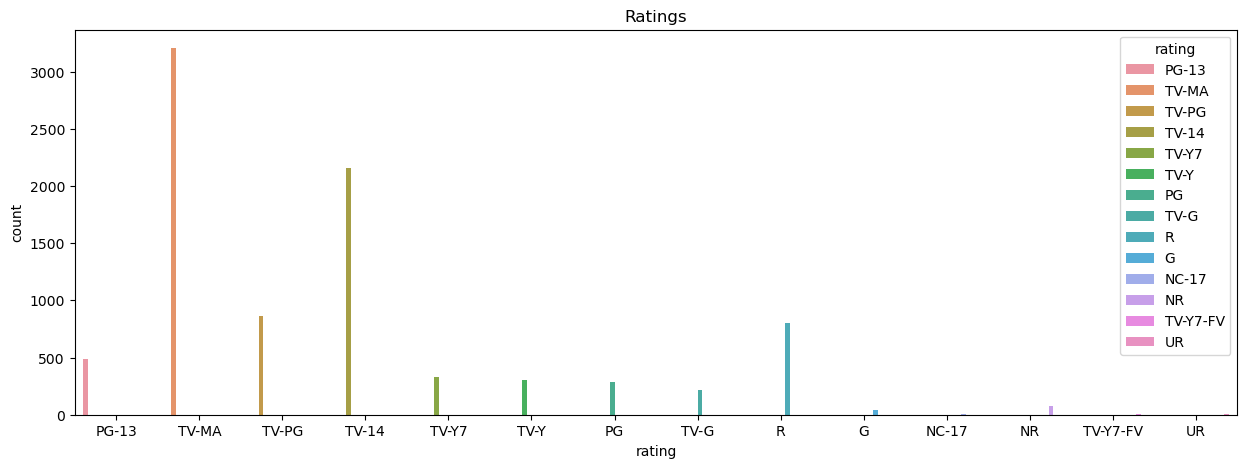

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(netflixdata,x='rating',hue='rating')
plt.title('Ratings')
plt.show()

TypeError: Axes.text() missing 1 required positional argument: 's'

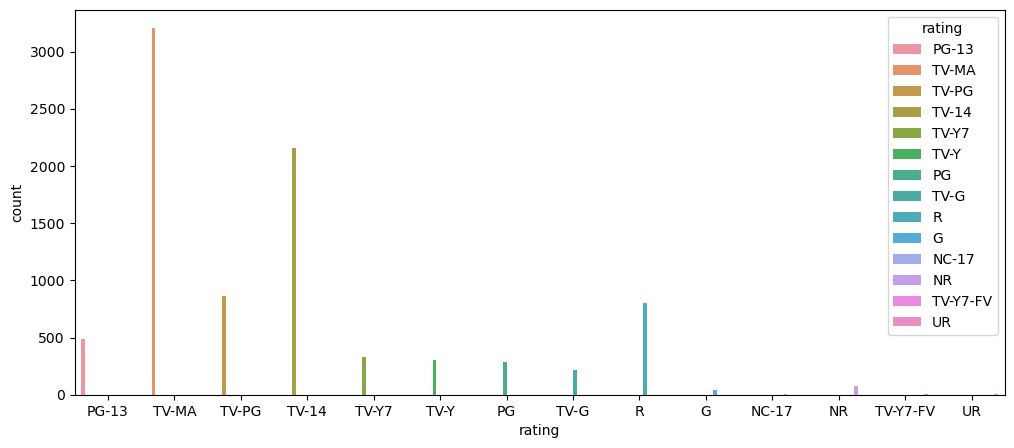

In [42]:
countplt,fig=plt.subplots(figsize=(12,5))
fig=sns.countplot(netflixdata,x='rating',hue='rating')
#fig
for counts in fig.patches:
    fig.text(counts.get_x(),counts.get_width().sum(),horizontalalignment='center',fontsize=11)
countplt

#plt.show()

In [71]:
netflixdata['release_year'].value_counts().head(10).values


array([1146, 1030, 1030,  953,  901,  592,  555,  352,  286,  236],
      dtype=int64)

In [76]:
netflixdata['release_year'].value_counts().head(10).index

Int64Index([2018, 2017, 2019, 2020, 2016, 2021, 2015, 2014, 2013, 2012], dtype='int64')

<Axes: >

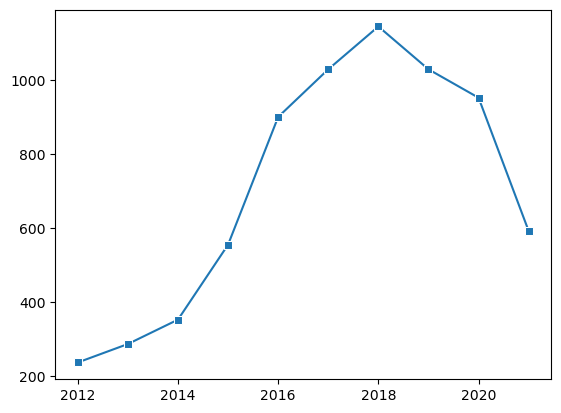

In [81]:
sns.lineplot(netflixdata['release_year'],x=netflixdata['release_year'].value_counts().head(10).index,y=netflixdata['release_year'].value_counts().head(10).values,marker='s')

In [144]:
counts=netflixdata['type'].value_counts()
counts.values

array([6126, 2664], dtype=int64)

In [145]:
TotalCount=sum(counts.values)
TotalCount

8790

In [146]:
percentage=[(count/TotalCount)*100for count in counts.values]
percentage

[69.69283276450511, 30.30716723549488]

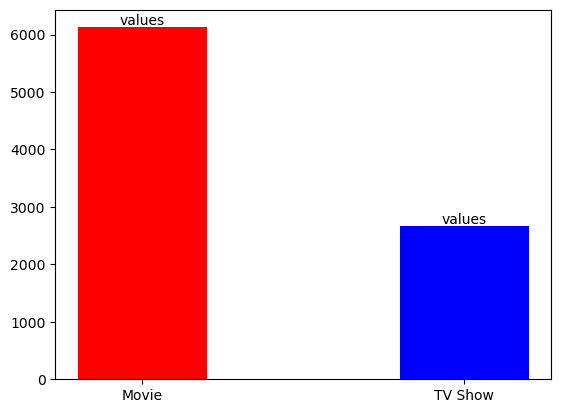

In [152]:
#fig=plt.figure(figsize=(10,5))
counts=netflixdata['type'].value_counts()
counts.values
percentage=[(count/TotalCount)*100for count in counts.values]
percentage
colors=['blue','red']
plt.bar(counts.index, counts.values,color=['red','blue'],width=0.4)
#plt.bar(counts.index, counts.values, color ='maroon',
        #width = 0.4)
for i,(count,percentage) in enumerate(zip(counts.values,percentage)):
    #plt.text(i,count,f'{count},({percentage:.1f}%)',ha='center',va='bottom')
    plt.text(i,count,'values',ha='center',va='bottom')
    #print(i,percentage)



In [176]:
topten=netflixdata.groupby(['country','type']).size().unstack()
#netflixdata.groupby(['country', 'type']).size().unstack()

In [166]:
netflixdata.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [187]:
topten

type,Movie,TV Show
country,,
Argentina,56.0,20.0
Australia,61.0,53.0
Austria,8.0,1.0
Bangladesh,3.0,NaN
Belarus,NaN,1.0
...,...,...
Uruguay,8.0,1.0
Venezuela,2.0,NaN
Vietnam,7.0,NaN


In [186]:
topten.sum(axis=1).nlargest(10).index

Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given',
       'Canada', 'Japan', 'South Korea', 'France', 'Spain'],
      dtype='object', name='country')

### Please get the top ten countries

In [190]:
countrylist=netflixdata['country'].value_counts().head(10).index
countrylist

Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given',
       'Canada', 'Japan', 'South Korea', 'France', 'Spain'],
      dtype='object')

In [188]:
netflixdata['country'].value_counts().head(10).values

array([3240, 1057,  638,  421,  287,  271,  259,  214,  213,  182],
      dtype=int64)

In [196]:
toptenplt=topten.loc[countrylist]
toptenplt

type,Movie,TV Show
United States,2395.0,845.0
India,976.0,81.0
United Kingdom,387.0,251.0
Pakistan,71.0,350.0
Not Given,257.0,30.0
Canada,187.0,84.0
Japan,87.0,172.0
South Korea,49.0,165.0
France,148.0,65.0
Spain,129.0,53.0


<Axes: >

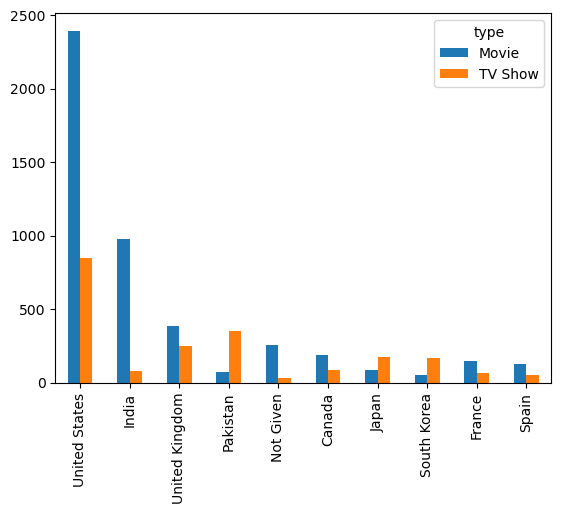

In [201]:
toptenplt.plot(kind='bar',stacked=False)

Text(0.5, 1.0, 'Count and top 10 Countries')

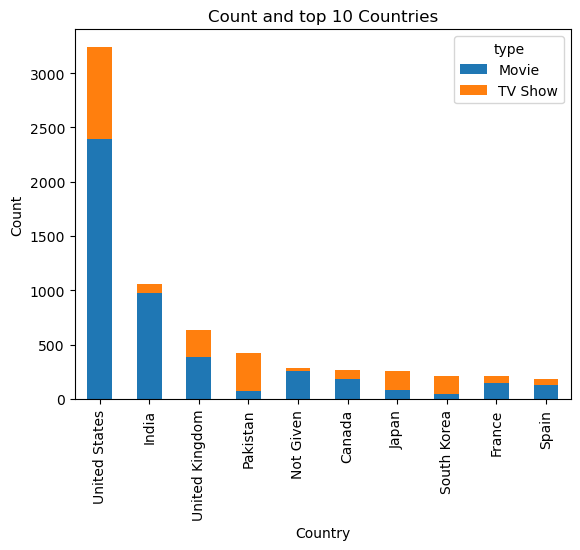

In [207]:
toptenplt.plot(kind='bar',stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count and top 10 Countries')

### data frame la type vandhu movie irundha adhoda year and adhoda count pani adha sort pananu 


In [53]:
moviecount=netflixdata[netflixdata['type']=='Movie']['release_year'].value_counts().sort_index()
moviecount

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    765
2018    767
2019    633
2020    517
2021    277
Name: release_year, Length: 73, dtype: int64

### data frame la type vandhu TV Show irundha adhoda year and adhoda count pani adha sort pananu 


In [15]:
tvshowcount=netflixdata[netflixdata['type']=='TV Show']['release_year'].value_counts().sort_index().head()

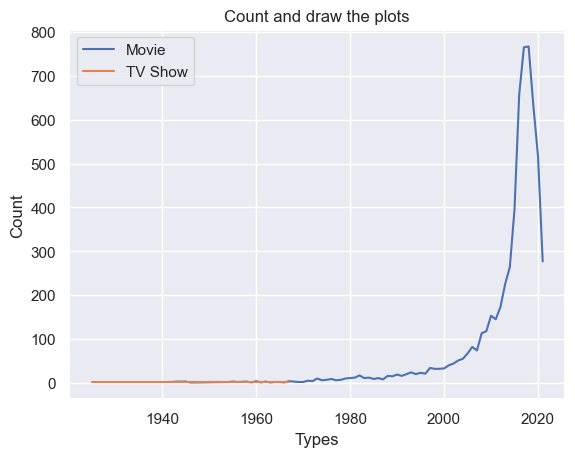

In [25]:
plt.plot(moviecount.index,moviecount.values,label='Movie')
plt.plot(tvshowcount.index,tvshowcount.values,label='TV Show')
plt.title('Count and draw the plots')
plt.xlabel('Types')
plt.ylabel('Count')
plt.legend()

In [26]:
import plotly.express as plt

In [28]:
netflixdata.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [50]:
netflixdata['director'].value_counts().head(10).values

array([2588,   20,   18,   18,   16,   16,   14,   13,   12,   12],
      dtype=int64)

In [46]:
toptendir=netflixdata.groupby(['director','type']).size().unstack()

In [52]:
toptendir.sum(axis=1).nlargest(10).values

array([2588.,   20.,   18.,   18.,   16.,   16.,   14.,   13.,   12.,
         12.])

In [70]:
newDF=netflixdata['country'].value_counts()
newDF

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

<BarContainer object of 3 artists>

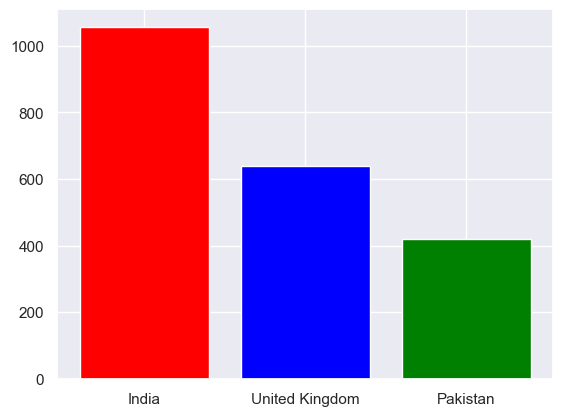

In [73]:
plt.bar([newDF.index[1],newDF.index[2],newDF.index[3]],[newDF.iloc[1],newDF.iloc[2],newDF.iloc[3]],color=['red','blue','green'])

In [77]:
usacountry=netflixdata[netflixdata['country']=='United States']
usacountry.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
13,s471,Movie,Bridgerton - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,7/13/2021,2021,TV-14,39 min,Movies


<Axes: xlabel='count', ylabel='rating'>

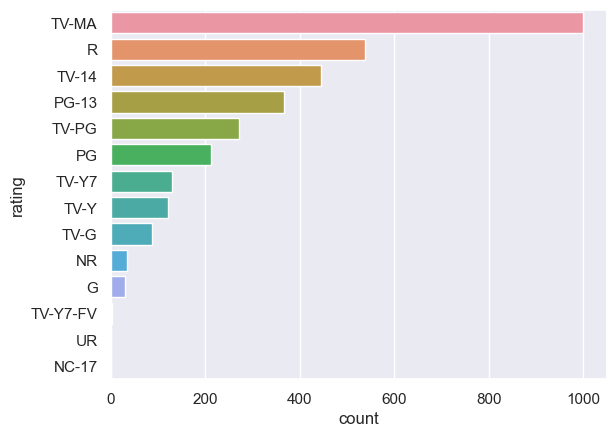

In [82]:
sns.countplot(data=usacountry,y='rating',order=usacountry['rating'].value_counts().index)

In [84]:
usacountry['rating'].value_counts().index

Index(['TV-MA', 'R', 'TV-14', 'PG-13', 'TV-PG', 'PG', 'TV-Y7', 'TV-Y', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
      dtype='object')

<Axes: xlabel='count', ylabel='release_year'>

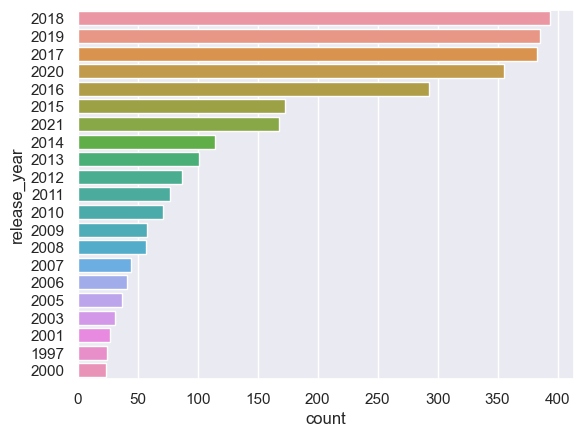

In [88]:
sns.countplot(data=usacountry,y='release_year',order=usacountry['release_year'].value_counts().head(21).index)

In [90]:
usacountry.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
13,s471,Movie,Bridgerton - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,7/13/2021,2021,TV-14,39 min,Movies


In [109]:
import plotly.express as px

In [122]:
netflixdata['country'].value_counts().head(5).values


array([3240, 1057,  638,  421,  287], dtype=int64)

In [123]:
netflixdata['country'].value_counts().head(5).index


Index(['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given'], dtype='object')

In [127]:
fig=plt.figure()
fig=px.pie(netflixdata,values=netflixdata['country'].value_counts().head(5).values
,names=netflixdata['country'].value_counts().head(5).index)
fig.show()

<Figure size 640x480 with 0 Axes>

In [133]:
val=px.pie(netflixdata,values=netflixdata['country'].head(5),names=netflixdata['country'].head(5))
val

In [146]:

val=netflixdata.groupby(['country','release_year'])['show_id'].count()
labels = ['United States','India','United Kingdom','Pakistan','Canada','Japan','South Korea','France','Spain']
selected = val.loc[labels]
selected=selected.sort_index(level=['country','release_year'],ascending=(False,True))
selected

country        release_year
United States  1942             2
               1943             3
               1944             3
               1945             4
               1946             2
                               ..
Canada         2017            39
               2018            48
               2019            25
               2020            34
               2021             7
Name: show_id, Length: 294, dtype: int64

<Axes: xlabel='type', ylabel='count'>

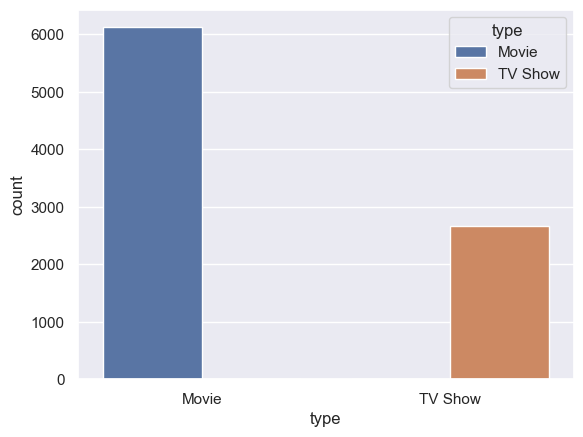

In [149]:
sns.countplot(netflixdata,x='type',hue='type')

<Axes: ylabel='count'>

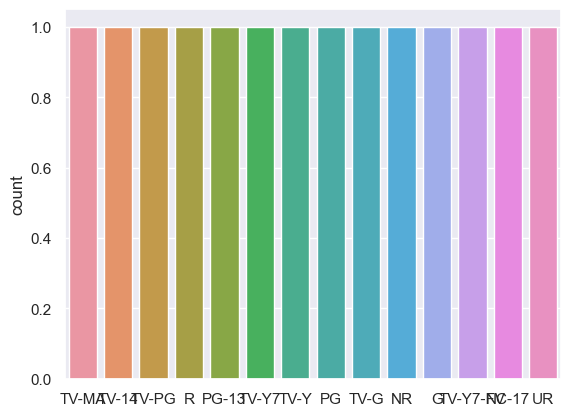

In [158]:
val=netflixdata['rating'].value_counts()
sns.countplot(netflixdata,x=netflixdata['rating'].value_counts().index)

In [156]:
plt.figure(figsize=(10,10))
sns.countplot(netflixdata["rating"])
plt.title("Rating Counts", fontsize=20)
plt.show()

ValueError: could not convert string to float: 'PG-13'

<Figure size 1000x1000 with 0 Axes>